In [1]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('bookflat.jpg')

### Find affine transformation given 3 non-collinear points before and after affine transformation

In [3]:
def calculate_affine_transform_matrix(points_before, points_after):
    points_before = np.vstack((points_before.T, np.ones(3)))
    M = np.dot(points_after.T, np.linalg.pinv(points_before))
    return M

In [16]:
(r,c) = image.shape[:2]
pts_one = np.array([[0,0],[r,0],[0,c]]).astype(np.float32)
pts_two = np.array([[50,0],[r,50],[0,c-50]]).astype(np.float32)

In [17]:
M = calculate_affine_transform_matrix(pts_one, pts_two)

In [18]:
dst = cv2.warpAffine(image,M,(c,r))

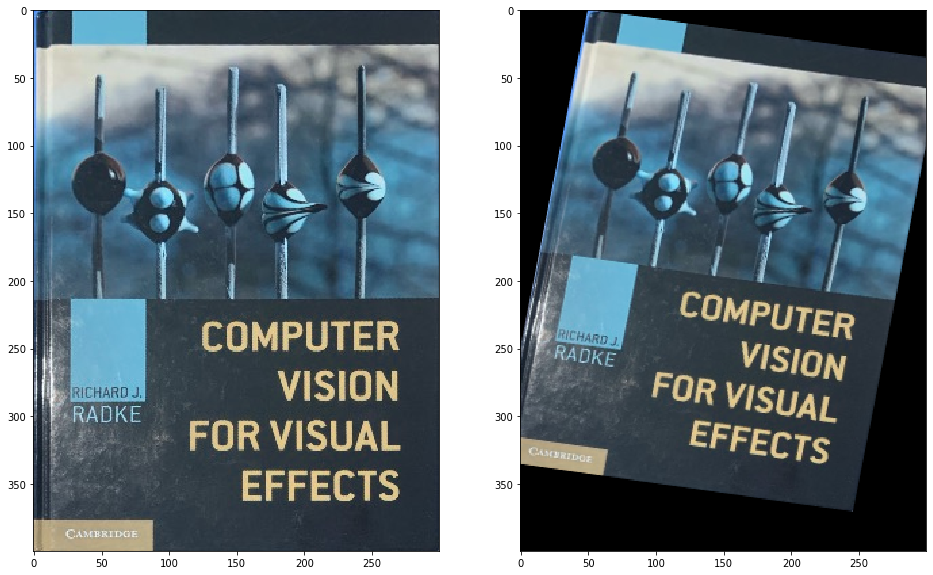

In [19]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(dst)

## Using opencv

In [20]:
M = cv2.getAffineTransform(pts_one, pts_two)

In [21]:
dst = cv2.warpAffine(image,M,(c,r))

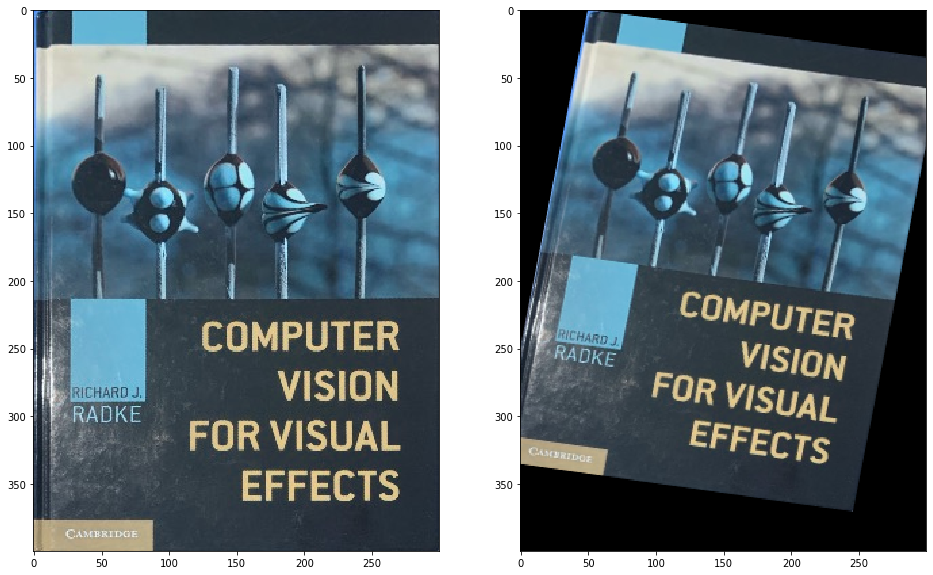

In [22]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(dst)